In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the input shape and number of classes (Arabic characters)
input_shape = (64, 64, 3)  # adjust based on your image dimensions
num_classes = 28  # assuming recognition of Arabic characters

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step


In [4]:
# Add your custom classification layers on top of the base VGG16 model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [5]:
# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Load and preprocess your dataset
data_dir = r'D:\anas\مشروع مواضيع خاصة 1\arabicChar'
batch_size = 5

data_generator = ImageDataGenerator(rescale=1./255)
data_flow = data_generator.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 448 images belonging to 28 classes.


In [9]:
# Train the model
model.fit(data_flow, epochs=20)

Epoch 1/20


C:\Users\Tilika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.0709 - loss: 3.3826
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.2744 - loss: 2.7563
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.3882 - loss: 2.3195
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.5887 - loss: 1.8473
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.6105 - loss: 1.6265
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.6751 - loss: 1.4237
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.6731 - loss: 1.3401
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.7096 - loss: 1.2082
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - accuracy: 0.7413 - loss: 1.0771
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.7445 - loss: 1.0215
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.7568 - loss: 0.9198
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/ste

In [7]:
# Evaluate the model
test_data_dir = r'D:\anas\‏‏arabicChartest'
test_data_generator = ImageDataGenerator(rescale=1./255)
test_data_flow = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get predictions for the test dataset
test_predictions = model.predict(test_data_flow)
test_true_labels = test_data_flow.classes
test_predicted_labels = np.argmax(test_predictions, axis=1)

Found 112 images belonging to 28 classes.


C:\Users\Tilika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step


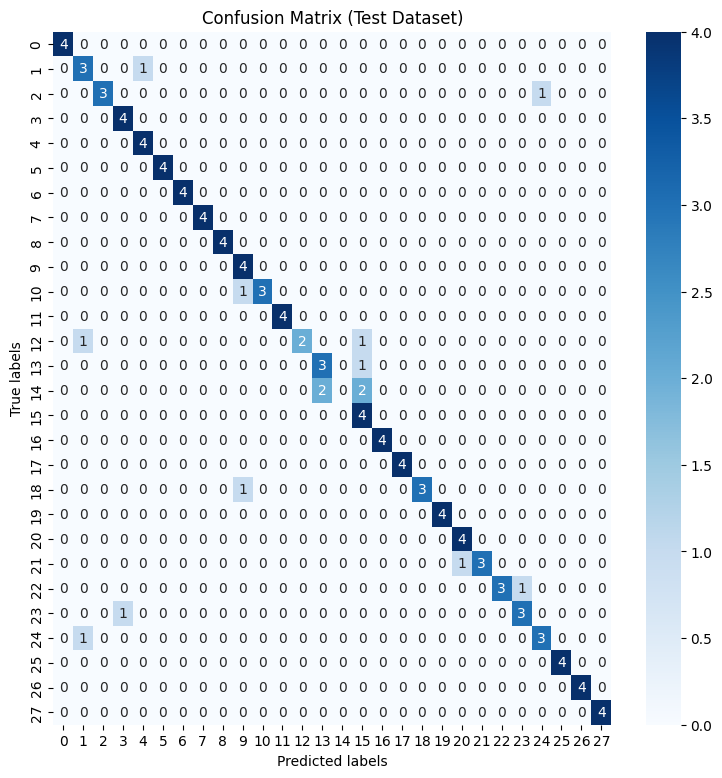

Accuracy: 0.8660714285714286
Accuracy : High
F1 Score : 0.854251700680272
F1 Score : High


In [8]:
# Calculate confusion matrix and F1 score and accuracy for the test dataset
test_conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
test_f1 = f1_score(test_true_labels, test_predicted_labels, average='weighted')
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
# Print the confusion matrix and F1 score and accuracy for the test dataset
plt.figure(figsize=(9,9))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Dataset)')
plt.show()
print(f"Accuracy: {accuracy}")
if accuracy >= 0.75:
    print("Accuracy : High")
elif accuracy >= 0.5:
    print("Accuracy : Medium")
else:
    print("Accuracy : Low")
print("F1 Score :", test_f1)
if test_f1 >= 0.75:
    print("F1 Score : High")
elif test_f1 >= 0.5:
    print("F1 Score : Medium")
else:
    print("F1 Score : Low")